<a href="https://colab.research.google.com/github/KarinaRmzG/Neuronal-Networks/blob/main/EVC_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt


# Step 1: Data Preparation

In [3]:
# Data paths
data_dir = '/content/drive/MyDrive/Brain_Stroke_CT-SCAN_image'
train_dir = os.path.join(data_dir, 'Train')
test_dir = os.path.join(data_dir, 'Test')
validation_dir = os.path.join(data_dir, 'Validation')

In [4]:
# Image dimensions
img_width, img_height = 224, 224

In [5]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary'
)

Found 1843 images belonging to 2 classes.
Found 235 images belonging to 2 classes.


# Step 2: Model Architecture

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 64)                1

# Step 3: Model Training

In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20
58/58 [==============================] - 723s 12s/step - loss: 0.5770 - accuracy: 0.7309 - val_loss: 0.2225 - val_accuracy: 0.9106
Epoch 2/20
58/58 [==============================] - 11s 185ms/step - loss: 0.1353 - accuracy: 0.9430 - val_loss: 0.0697 - val_accuracy: 0.9660
Epoch 3/20
58/58 [==============================] - 10s 175ms/step - loss: 0.0513 - accuracy: 0.9816 - val_loss: 0.0474 - val_accuracy: 0.9872
Epoch 4/20
58/58 [==============================] - 9s 154ms/step - loss: 0.0208 - accuracy: 0.9951 - val_loss: 0.0489 - val_accuracy: 0.9830
Epoch 5/20
58/58 [==============================] - 10s 163ms/step - loss: 0.0070 - accuracy: 0.9984 - val_loss: 0.0318 - val_accuracy: 0.9787
Epoch 6/20
58/58 [==============================] - 10s 168ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0448 - val_accuracy: 0.9830
Epoch 7/20
58/58 [==============================] - 8s 141ms/step - loss: 8.2477e-04 - accuracy: 1.0000 - val_loss: 0.0387 - val_accuracy: 0.987

# Step 4: Model Evaluation

In [9]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

loss, accuracy = model.evaluate(test_generator)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Found 437 images belonging to 2 classes.
14/14 [==============================] - 59s 5s/step - loss: 0.1912 - accuracy: 0.9565
Test Loss: 0.19119414687156677
Test Accuracy: 0.95652174949646


# Plot accuracy versus epoch

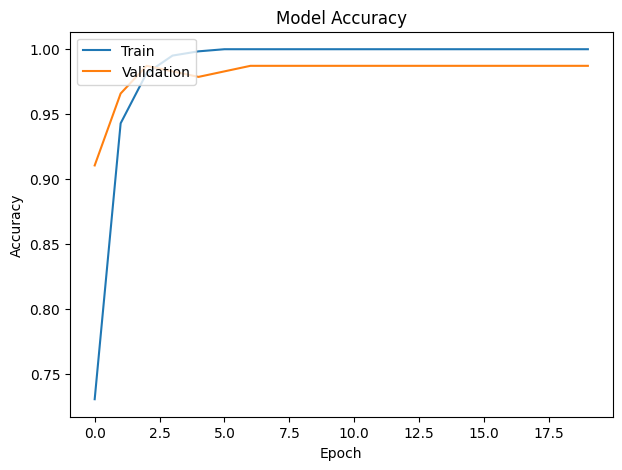

In [10]:
beingsaved = plt.figure(figsize=(7, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
beingsaved.savefig('Accuracy.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

# Plot loss versus epoch

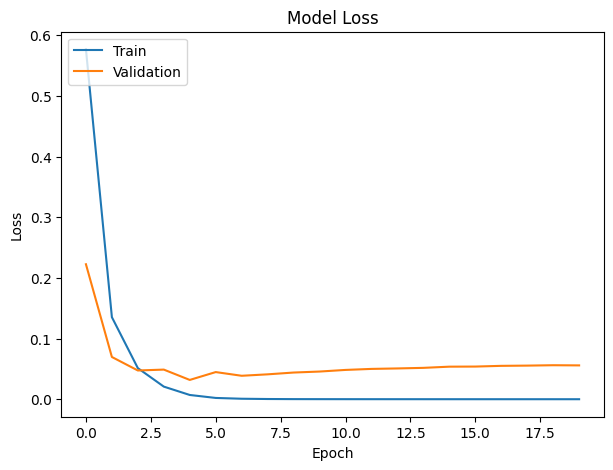

In [11]:
beingsaved = plt.figure(figsize=(7, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
beingsaved.savefig('Loss.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

1/1 [==============================] - 0s 29ms/step


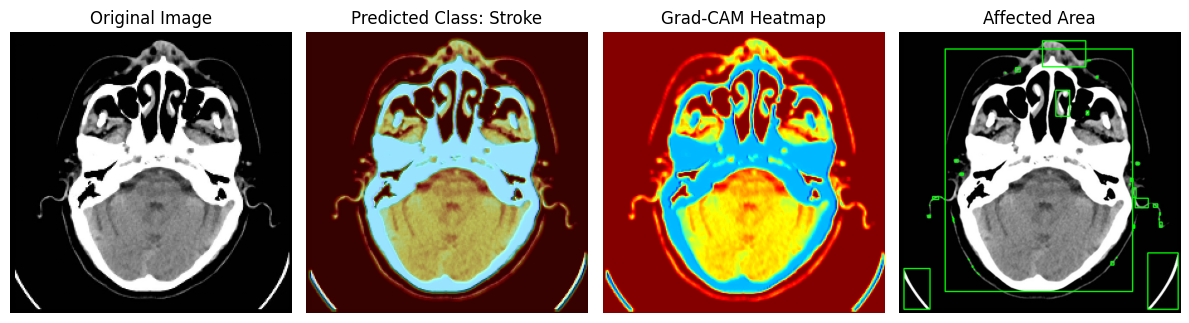

In [19]:
def Affected_Area(img_path):
    image = cv2.imread(img_path)
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply image processing operations (e.g., thresholding, morphological operations) for stroke detection
    _, thresholded_image = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    closed_image = cv2.morphologyEx(thresholded_image, cv2.MORPH_CLOSE, kernel)

    # Find contours in the closed image
    contours, _ = cv2.findContours(closed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a list to store the bounding boxes
    bounding_boxes = []

    # Draw bounding boxes around the contours
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        bounding_boxes.append((x, y, x + w, y + h))
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    return image

target_class_index = 1
img_path = '/content/drive/MyDrive/Brain_Stroke_CT-SCAN_image/Test/Stroke/58 (12).jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (img_width, img_height))
img = np.expand_dims(img, axis=0) / 255.0

grad_model = tf.keras.models.Model(
    [model.inputs],
    [model.get_layer('conv2d').output, model.output]  # Modify 'conv2d_1' to match the actual layer name
)

with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(img)
    loss = predictions[:, 0]  # Select the first (and only) element along the second dimension

grads = tape.gradient(loss, conv_outputs)[0]
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_outputs[0]), axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

heatmap = cv2.resize(heatmap, (img.shape[2], img.shape[1]))
heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)

superimposed_img = cv2.addWeighted(
    np.uint8(255 * img[0]),
    0.6,
    np.uint8(heatmap),
    0.4,
    0
)

plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1)
plt.imshow(img[0])
plt.title('Original Image')
plt.axis('off')

predicted_class = model.predict(img)
predicted_class_index = int(predicted_class[0] >= 0.5)  # Get the index of the predicted class
class_names = ['No Stroke', 'Stroke']  # Define the class names

if predicted_class_index == 1:
    plt.subplot(1, 4, 2)
    plt.imshow(superimposed_img)
    plt.title(f'Predicted Class: {class_names[predicted_class_index]}')
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(heatmap)
    plt.title('Grad-CAM Heatmap')
    plt.axis('off')

    Stroke_Affected = Affected_Area(img_path)

    plt.subplot(1, 4, 4)
    plt.imshow(Stroke_Affected)
    plt.title('Affected Area')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    plt.subplot(1, 4, 2)
    plt.imshow(img[0])
    plt.title(f'Predicted Class: {class_names[predicted_class_index]}')
    plt.axis('off')

Found 437 images belonging to 2 classes.
14/14 [==============================] - 3s 158ms/step


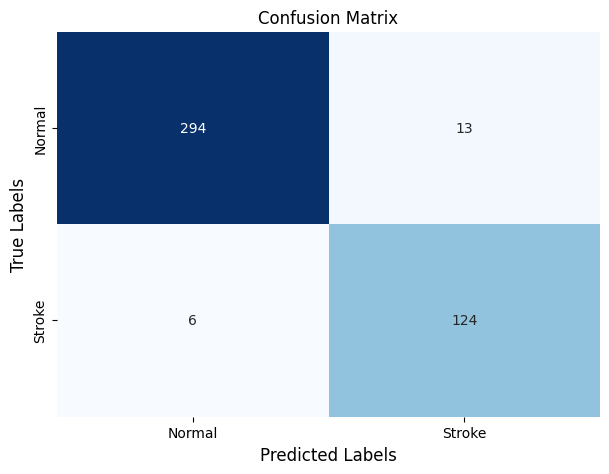

Precision: 0.9051094890510949
Recall: 0.9538461538461539
F1 Score: 0.9288389513108616


In [20]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Rest of the code...

# Step 4: Model Evaluation
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

y_pred = model.predict(test_generator)
y_pred = np.round(y_pred).flatten()
y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)



# Plot confusion matrix
label_names = ['Normal', 'Stroke']  # Replace with your class labels
beingsaved = plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xticks(np.arange(len(label_names)) + 0.5, label_names)
plt.yticks(np.arange(len(label_names)) + 0.5, label_names)
plt.xlabel('Predicted Labels',fontsize=12)
plt.ylabel('True Labels',fontsize=12)
plt.title('Confusion Matrix')
beingsaved.savefig('Stroke_Confusion_Matrix.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

In [21]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

# Load the pre-trained VGG16 model
model = VGG16(weights='imagenet')

# Define the transformation to preprocess the image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Load the CT scan image
image_path = '/content/drive/MyDrive/Brain_Stroke_CT-SCAN_image/Test/Stroke/58 (12).jpg'  # Replace with the actual image path
input_image = preprocess_image(image_path)

# Forward pass through the model
predictions = model.predict(input_image)

# Get the predicted class index
predicted_class = np.argmax(predictions)

# Get the gradients of the predicted class with respect to the feature maps
grad_model = tf.keras.models.Model([model.inputs], [model.get_layer('block5_conv3').output, model.output])
with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(input_image)
    loss = predictions[:, predicted_class]

grads = tape.gradient(loss, conv_outputs)[0]

# Get the feature maps from the last convolutional layer
activations = conv_outputs[0]

# Compute the CAM using global average pooling on the gradients
weights = tf.reduce_mean(grads, axis=(0, 1, 2))
cam = tf.reduce_sum(tf.multiply(weights, activations), axis=-1)
cam = np.maximum(cam, 0)  # Apply ReLU activation
cam = cv2.resize(cam.numpy(), (224, 224))
cam = cam - np.min(cam)
cam = cam / np.max(cam)

# Convert the CAM to the uint8 data type
cam_uint8 = np.uint8(255 * cam)

# Convert the three-channel image to a two-dimensional grayscale image
cam_gray = cv2.cvtColor(cam_uint8, cv2.COLOR_GRAY2BGR)

# Apply the color map to the CAM
heatmap = cv2.applyColorMap(cam_gray, cv2.COLORMAP_JET)

# Load the original image
original_image = cv2.imread(image_path)

# Apply the CAM as an overlay on the original image
output_image = cv2.addWeighted(original_image, 0.7, heatmap, 0.3, 0)

# Display the result
plt.imshow(output_image[:, :, ::-1])  # BGR to RGB
plt.title('Blood Find')
plt.axis('off')
plt.show()


1/1 [==============================] - 1s 726ms/step


AttributeError: ignored

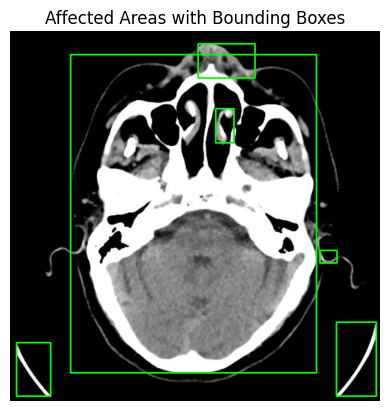

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the CT scan image
image_path = '/content/drive/MyDrive/Brain_Stroke_CT-SCAN_image/Test/Stroke/58 (12).jpg'
image = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply image processing operations (e.g., thresholding, morphological operations) for stroke detection
_, thresholded_image = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
closed_image = cv2.morphologyEx(thresholded_image, cv2.MORPH_CLOSE, kernel)

# Find contours in the closed image
contours, _ = cv2.findContours(closed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a list to store the bounding boxes
bounding_boxes = []

# Draw bounding boxes around the contours
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)

    # Filter out small bounding boxes
    if w > 10 and h > 10:
        bounding_boxes.append((x, y, x + w, y + h))
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the original image with bounding boxes around the affected areas
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Affected Areas with Bounding Boxes')
plt.axis('off')

plt.show()

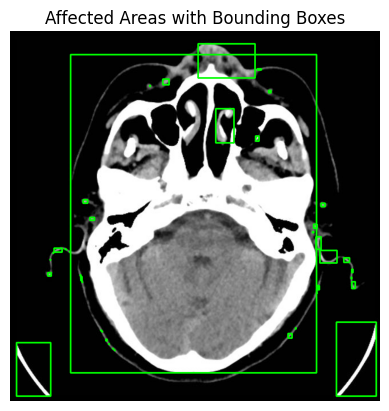

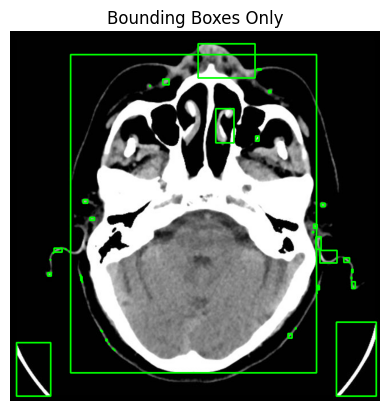

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the CT scan image
image_path = '/content/drive/MyDrive/Brain_Stroke_CT-SCAN_image/Test/Stroke/58 (12).jpg'
image = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply image processing operations (e.g., thresholding, morphological operations) for stroke detection
_, thresholded_image = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
closed_image = cv2.morphologyEx(thresholded_image, cv2.MORPH_CLOSE, kernel)

# Find contours in the closed image
contours, _ = cv2.findContours(closed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a list to store the bounding boxes
bounding_boxes = []

# Draw bounding boxes around the contours
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    bounding_boxes.append((x, y, x + w, y + h))
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the original image with bounding boxes around the affected areas
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Affected Areas with Bounding Boxes')
plt.axis('off')

# Draw the bounding boxes on a separate image
boxes_image = np.copy(image)
for box in bounding_boxes:
    x1, y1, x2, y2 = box
    boxes_image = cv2.rectangle(boxes_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display the image with only the bounding boxes
plt.figure()
plt.imshow(cv2.cvtColor(boxes_image, cv2.COLOR_BGR2RGB))
plt.title('Bounding Boxes Only')
plt.axis('off')

plt.show()

In [47]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

target_class_index = 1
img_path = '/content/drive/MyDrive/Brain_Stroke_CT-SCAN_image/Test/Stroke/58 (12).jpg'
img = cv2.imread(img_path)
img_width, img_height = 256, 256
img = cv2.resize(img, (img_width, img_height))
img = np.expand_dims(img, axis=0) / 255.0

grad_model = tf.keras.models.Model(
    [model.inputs],
    [model.get_layer('conv2d_2').output, model.output]
)

with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(img)
    loss = predictions[0]

grads = tape.gradient(loss, conv_outputs)[0]
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

# Calcular el Grad-CAM
heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_outputs[0]), axis=-1)
heatmap = np.maximum(heatmap, 0)
max_value = np.max(heatmap)
if max_value != 0:
    heatmap /= max_value
heatmap = cv2.resize(heatmap, (img.shape[2], img.shape[1]))
heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)

superimposed_img = cv2.addWeighted(
    np.uint8(255 * img[0]),
    0.6,
    np.uint8(heatmap),
    0.4,
    0
)

# Realizar una predicción con el modelo original
predicted_class = model.predict(img)
predicted_class = np.squeeze(predicted_class)  # Asegurar que es un array de una dimensión
#predicted_class_index = int(predicted_class >= 0.5)
predicted_class_index = np.argmax(predicted_class)
class_names = ['No Stroke', 'Stroke']

print('Class:', predicted_class_index)


# Visualización
if predicted_class_index < len(class_names):
    if predicted_class_index == 1:
        fig, axs = plt.subplots(1, 3, figsize=(12, 6))
        axs[0].imshow(img[0])
        axs[0].set_title('Original Image')
        axs[0].axis('off')

        axs[1].imshow(superimposed_img)
        axs[1].set_title(f'Predicted Class: {class_names[predicted_class_index]}')
        axs[1].axis('off')

        # Mark affected areas in blue
        affected_areas = np.where(heatmap > 0)
        mask = np.zeros_like(img)
        mask[0, affected_areas[0], affected_areas[1], :] = [255, 0, 255]
        masked_img = np.where(mask, img, [0, 0, 0])

        axs[2].imshow(masked_img[0])
        axs[2].set_title('Affected Areas (Blue)')
        axs[2].axis('off')
    else:
        plt.imshow(img[0])
        plt.title(f'Predicted Class: {class_names[predicted_class_index]}')
        plt.axis('off')
        plt.show()
else:
    print("Error: predicted_class_index out of range.")

1/1 [==============================] - 0s 108ms/step
Class: 14533
Error: predicted_class_index out of range.


In [42]:
for layer in model.layers:
    print(layer.name)


input_2
conv2d_2
conv2d_3
max_pooling2d_2
conv2d_4
conv2d_5
max_pooling2d_3
conv2d_6
conv2d_7
up_sampling2d
concatenate
conv2d_8
conv2d_9
up_sampling2d_1
concatenate_1
conv2d_10
conv2d_11
conv2d_12


In [26]:
!pip install kaggle

In [27]:
from google.colab import files

uploaded = files.upload()

# Mueve el archivo kaggle.json al directorio correcto
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [28]:
# Reemplaza "nombreusuario/nombre-del-conjunto-de-datos" con la ruta correcta de tu conjunto de datos en Kaggle
!kaggle datasets download -d vbookshelf/computed-tomography-ct-images

 90% 81.0M/90.2M [00:01<00:00, 75.9MB/s]
100% 90.2M/90.2M [00:01<00:00, 69.9MB/s]


In [29]:
import zipfile
import os

zip_path = '/content/computed-tomography-ct-images.zip'  # Reemplaza con el nombre correcto del archivo ZIP
extract_path = '/content/dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Verificar que los archivos se hayan descomprimido correctamente
os.listdir(extract_path)


['computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.0.0']

In [30]:
import os

dataset_path = '/content/dataset'  # Reemplaza con la ruta correcta

# Listar los archivos en el directorio
file_list = os.listdir(dataset_path)

# Imprimir algunos nombres de archivos como ejemplo
print(file_list[:5])


['computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.0.0']


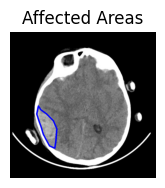

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
original_image = cv2.imread('/content/dataset/computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.0.0/Patients_CT/075/brain/20.jpg')
# Load the segmentation mask (example: binary mask where 255 represents stroke-affected regions)
segmentation_mask = cv2.imread('/content/dataset/computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.0.0/Patients_CT/075/brain/20_HGE_Seg.jpg', cv2.IMREAD_GRAYSCALE)

# Threshold the segmentation mask to obtain stroke regions
_, thresholded_mask = cv2.threshold(segmentation_mask, 128, 255, cv2.THRESH_BINARY)

# Find contours of the stroke regions
contours, _ = cv2.findContours(thresholded_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Mark stroke regions in the original image
marked_image = original_image.copy()
cv2.drawContours(marked_image, contours, -1, (0, 0, 255), 5)  # Draw red contours around stroke regions


plt.subplot(133), plt.imshow(marked_image, cmap='gray')
plt.title('Affected Areas'), plt.axis('off')
plt.show()

In [32]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, UpSampling2D, concatenate

def create_unet_model(input_shape):
    # Encoder
    inputs = Input(input_shape)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    # Decoder
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    up1 = UpSampling2D(size=(2, 2))(conv3)

    merge1 = concatenate([conv2, up1], axis=3)
    conv4 = Conv2D(128, 3, activation='relu', padding='same')(merge1)
    conv4 = Conv2D(128, 3, activation='relu', padding='same')(conv4)
    up2 = UpSampling2D(size=(2, 2))(conv4)

    merge2 = concatenate([conv1, up2], axis=3)
    conv5 = Conv2D(64, 3, activation='relu', padding='same')(merge2)
    conv5 = Conv2D(64, 3, activation='relu', padding='same')(conv5)

    outputs = Conv2D(1, 1, activation='sigmoid')(conv5)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Example usage of the create_unet_model function
input_shape = (256, 256, 3)  # Specify the input shape of your images
model = create_unet_model(input_shape)
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_2 (Conv2D)           (None, 256, 256, 64)         1792      ['input_2[0][0]']             
                                                                                                  
 conv2d_3 (Conv2D)           (None, 256, 256, 64)         36928     ['conv2d_2[0][0]']            
                                                                                                  
 max_pooling2d_2 (MaxPoolin  (None, 128, 128, 64)         0         ['conv2d_3[0][0]']            
 g2D)                                                                                       

In [34]:
model.save("path_to_unet_model.h5")

1/1 [==============================] - 1s 711ms/step


(Text(0.5, 1.0, 'Segmentation'), (-0.5, 255.5, 255.5, -0.5))

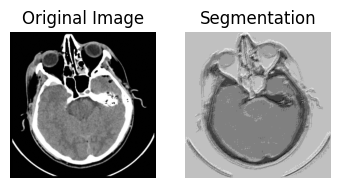

In [35]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the U-Net model
model = load_model('/content/path_to_unet_model.h5')

# Load and preprocess the input image
input_image = cv2.imread('/content/dataset/computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.0.0/Patients_CT/049/brain/14.jpg')
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
input_image = cv2.resize(input_image, (256, 256))
input_image = input_image / 255.0
input_image = np.expand_dims(input_image, axis=0)

# Generate the segmentation mask
segmentation_mask = model.predict(input_image)
segmentation_mask = np.squeeze(segmentation_mask)
segmentation_mask = (segmentation_mask * 255).astype(np.uint8)

plt.subplot(131), plt.imshow(input_image[0], cmap='gray')
plt.title('Original Image'), plt.axis('off')
plt.subplot(132), plt.imshow(segmentation_mask, cmap='gray')
plt.title('Segmentation'), plt.axis('off')

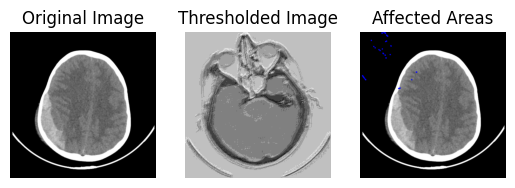

In [36]:
# Threshold the segmentation mask to obtain stroke regions
_, thresholded_mask = cv2.threshold(segmentation_mask, 128, 255, cv2.THRESH_BINARY)

# Find contours of the stroke regions
contours, _ = cv2.findContours(thresholded_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Mark stroke regions in the original image
marked_image = original_image.copy()
cv2.drawContours(marked_image, contours, -1, (0, 0, 255), 5)  # Draw red contours around stroke regions

plt.subplot(131), plt.imshow(original_image, cmap='gray')
plt.title('Original Image'), plt.axis('off')
plt.subplot(132), plt.imshow(segmentation_mask, cmap='gray')
plt.title('Thresholded Image'), plt.axis('off')
plt.subplot(133), plt.imshow(marked_image, cmap='gray')
plt.title('Affected Areas'), plt.axis('off')
plt.show()

In [41]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Set the path to your dataset
train_dir = '/content/drive/MyDrive/Brain_Stroke_CT-SCAN_image/Train'
test_dir = '/content/drive/MyDrive/Brain_Stroke_CT-SCAN_image/Test'
val_dir = '/content/drive/MyDrive/Brain_Stroke_CT-SCAN_image/Validation'

label_mapping = {'Normal': 0, 'Stroke': 1}

# Define the autoencoder-decoder model for segmentation
def create_autoencoder_model(input_shape):
    input_img = keras.Input(shape=input_shape)

    # Encoder
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)  # Update to 3 channels

    model = keras.Model(input_img, decoded)
    return model

# Set the input shape
input_shape = (28, 28, 3)  # Update with your image dimensions

# Create the autoencoder-decoder model
autoencoder_model = create_autoencoder_model(input_shape)
autoencoder_model.compile(optimizer='adam', loss='binary_crossentropy')

# Load and preprocess the dataset
def load_and_preprocess_data(directory):
    image_paths = []
    labels = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.jpg') or file.endswith('.png'):
                image_paths.append(os.path.join(root, file))
                label = os.path.basename(root)
                labels.append(label_mapping[label])

    unique_labels = set(labels)
    print("Unique Labels:", unique_labels)

    images = []
    for image_path in image_paths:
        image = tf.keras.preprocessing.image.load_img(image_path, target_size=input_shape[:2])
        image = tf.keras.preprocessing.image.img_to_array(image)
        image = image / 255.0  # Normalize pixel values to [0, 1]
        images.append(image)

    images = np.array(images)
    labels = np.array(labels)
    return images, labels

x_train, y_train = load_and_preprocess_data(train_dir)
x_test, y_test = load_and_preprocess_data(test_dir)
x_val, y_val = load_and_preprocess_data(val_dir)

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 2)
y_test = keras.utils.to_categorical(y_test, 2)
y_val = keras.utils.to_categorical(y_val, 2)

# Train the autoencoder-decoder model for segmentation
autoencoder_model.fit(x_train, x_train, batch_size=32, epochs=10, validation_data=(x_val, x_val))

# Evaluate the autoencoder-decoder model
autoencoder_loss = autoencoder_model.evaluate(x_test, x_test)
print("Autoencoder Segmentation Loss: {:.4f}".format(autoencoder_loss))


Unique Labels: {0, 1}
Unique Labels: {0, 1}
Unique Labels: {0, 1}
Epoch 1/10
58/58 [==============================] - 3s 17ms/step - loss: 0.5468 - val_loss: 0.3571
Epoch 2/10
58/58 [==============================] - 0s 7ms/step - loss: 0.3175 - val_loss: 0.3085
Epoch 3/10
58/58 [==============================] - 0s 8ms/step - loss: 0.2975 - val_loss: 0.2972
Epoch 4/10
58/58 [==============================] - 0s 7ms/step - loss: 0.2889 - val_loss: 0.2908
Epoch 5/10
58/58 [==============================] - 0s 5ms/step - loss: 0.2836 - val_loss: 0.2862
Epoch 6/10
58/58 [==============================] - 0s 5ms/step - loss: 0.2792 - val_loss: 0.2820
Epoch 7/10
58/58 [==============================] - 0s 5ms/step - loss: 0.2754 - val_loss: 0.2785
Epoch 8/10
58/58 [==============================] - 0s 5ms/step - loss: 0.2723 - val_loss: 0.2762
Epoch 9/10
58/58 [==============================] - 0s 6ms/step - loss: 0.2698 - val_loss: 0.2736
Epoch 10/10
14/14 [==============================] 

In [39]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import cv2

# Load the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# Convert RGB images to grayscale
"""x_train_gray = cv2.cvtColor(x_train, cv2.COLOR_RGB2GRAY)
x_val_gray = cv2.cvtColor(x_val, cv2.COLOR_RGB2GRAY)
x_test_gray = cv2.cvtColor(x_test, cv2.COLOR_RGB2GRAY)"""

# Reshape grayscale images to have a single channel
x_train_gray = x_train.reshape(-1, 28, 28, 1)
x_val_gray = x_val.reshape(-1, 28, 28, 1)
x_test_gray = x_test.reshape(-1, 28, 28, 1)

# Define the LeNet model
lenet_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(16, kernel_size=(5, 5), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(120, activation='relu'),
    keras.layers.Dense(84, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the LeNet model
lenet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the LeNet model
lenet_model.fit(x_train_gray, y_train, batch_size=32, epochs=10, validation_data=(x_val_gray, y_val))

# Define the autoencoder-decoder model
input_shape = (28, 28, 1)
autoencoder_model = keras.models.Sequential([
    keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape),
    keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
    keras.layers.Conv2D(8, kernel_size=(3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
    keras.layers.Conv2D(8, kernel_size=(3, 3), activation='relu', padding='same'),
    keras.layers.UpSampling2D((2, 2)),
    keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same'),
    keras.layers.UpSampling2D((2, 2)),
    keras.layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')
])

# Compile the autoencoder-decoder model
autoencoder_model.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder-decoder model for segmentation
autoencoder_model.fit(x_train_gray, x_train_gray, batch_size=32, epochs=10, validation_data=(x_val_gray, x_val_gray))

# Evaluate the models
lenet_loss, lenet_accuracy = lenet_model.evaluate(x_test_gray, y_test)
autoencoder_loss = autoencoder_model.evaluate(x_test_gray, x_test_gray)

print('LeNet Model - Loss: {}, Accuracy: {}'.format(lenet_loss, lenet_accuracy))
print('Autoencoder Model - Loss: {}'.format(autoencoder_loss))

Epoch 1/10
1688/1688 [==============================] - 11s 6ms/step - loss: -473376915456.0000 - accuracy: 0.1127 - val_loss: -2677843689472.0000 - val_accuracy: 0.1090
Epoch 2/10
1688/1688 [==============================] - 8s 4ms/step - loss: -19166465622016.0000 - accuracy: 0.1127 - val_loss: -50694677594112.0000 - val_accuracy: 0.1090
Epoch 3/10
1688/1688 [==============================] - 10s 6ms/step - loss: -131427475652608.0000 - accuracy: 0.1127 - val_loss: -249406787944448.0000 - val_accuracy: 0.1090
Epoch 4/10
1688/1688 [==============================] - 8s 4ms/step - loss: -465735214170112.0000 - accuracy: 0.1127 - val_loss: -750542380859392.0000 - val_accuracy: 0.1090
Epoch 5/10
1688/1688 [==============================] - 9s 5ms/step - loss: -1196212145356800.0000 - accuracy: 0.1127 - val_loss: -1753216387645440.0000 - val_accuracy: 0.1090
Epoch 6/10
1688/1688 [==============================] - 8s 5ms/step - loss: -2554814588256256.0000 - accuracy: 0.1127 - val_loss: -35